In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#reshape(-1,28*28) means -1 indicates when i dont know how many samples, i have then by default take those many values
x_train1=x_train.reshape(-1,28*28)
x_test1=x_test.reshape(-1,28*28)
print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


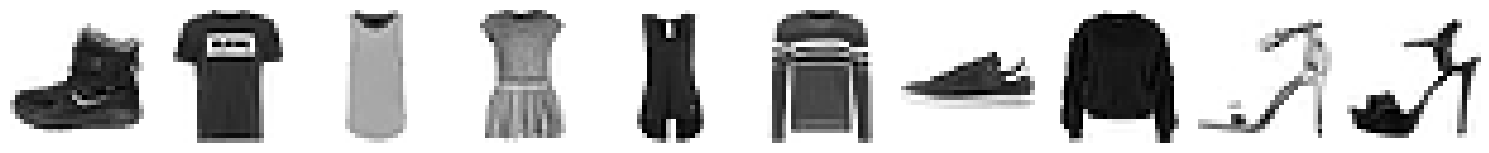

In [ ]:
plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(5,10,i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 6000],
       [   1, 6000],
       [   2, 6000],
       [   3, 6000],
       [   4, 6000],
       [   5, 6000],
       [   6, 6000],
       [   7, 6000],
       [   8, 6000],
       [   9, 6000]])

In [ ]:
class_names = ["T-shirt/top" , "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from keras.models import  Sequential
from keras.layers import Dense,Activation
ann=Sequential()
ann.add(Dense(10,activation='relu',input_dim=784))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(10,activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 100)               1100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 20060 (78.36 KB)
Trainable params: 20060 (78.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#(inputs*layers+bias)+(inputs*layers+bias)+(inputs*layers+bias)
#(784*10*+10)+(10*100+100)+(100*100+100)+(100*10+10)

In [ ]:
ann2=Sequential()
ann2.add(Dense(30,activation='relu',input_dim=784))
ann2.add(Dense(100,activation='relu'))
ann2.add(Dense(100,activation='relu'))
ann2.add(Dense(10,activation='softmax'))
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                23550     
                                                                 
 dense_5 (Dense)             (None, 100)               3100      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 37760 (147.50 KB)
Trainable params: 37760 (147.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#(inputs*layers+bias)+(inputs*layers+bias)+(inputs*layers+bias)
#(784*30*+30)+(30*100+100)+(100*100+100)+(100*10+10)

In [ ]:
ann.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
ann2.compile(optimizer='rmsprop',loss='categorical_crossentropy')

In [ ]:
#history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

In [ ]:
import tensorflow as tf
ann2.fit(x_train1,tf.keras.utils.to_categorical(y_train),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3278
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7202
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6857
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6813
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6796
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6950
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6684
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6641
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7065


In [ ]:
ann2.predict(x_train1).shape

1875/1875 [==============================] - 3s 1ms/step


(60000, 10)

In [ ]:
np.argmax(ann2.predict(x_train1)[0])

1875/1875 [==============================] - 3s 1ms/step


9

In [ ]:
np.max(ann2.predict(x_train1)[0])

1875/1875 [==============================] - 4s 2ms/step


0.9991373

In [ ]:
import pandas as pd
trainpreds=np.argmax(ann2.predict(x_train1),axis=1)
testpreds=np.argmax(ann2.predict(x_test1),axis=1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(trainpreds.shape)
print(testpreds.shape)

(60000,)
(10000,)


In [ ]:
np.sum(y_test==testpreds)

7200

In [ ]:
print("train accuracy",np.sum(y_train==trainpreds)/len(y_train))
print("test accuracy",np.sum(y_test==testpreds)/len(y_test))

train accuracy 0.7317666666666667
test accuracy 0.72


In [ ]:
from keras.layers import Conv2D,MaxPool2D,Flatten
cnn1=Sequential()
cnn1.add(Conv2D(filters=8,kernel_size=(2,2),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
cnn1.add(MaxPool2D(padding='same'))
cnn1.add(Flatten())
#cnn1.add(Dense(200,activation='relu'))
cnn1.add(Dense(10,activation='softmax'))
cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                15690     
                                                                 
Total params: 15730 (61.45 KB)
Trainable params: 15730 (61.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
